In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
import os
mouse_drug_data_to_load = os.path.join("data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
df=pd.merge(df1,df2, how='outer', on="Mouse ID")

# Display the data table for preview
df.head(5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
drug_tp_grp_tumor_vol_df = df.groupby(["Timepoint", "Drug"])["Tumor Volume (mm3)"].mean().to_frame()


In [3]:
# Minor Data Munging to Re-Format the Data Frames
# Preview DataFrame
drug_tp_grp_tumor_vol_df=drug_tp_grp_tumor_vol_df.reset_index()
df_tumor_vol = drug_tp_grp_tumor_vol_df.pivot(index = 'Timepoint', columns = 'Drug', values = "Tumor Volume (mm3)")
df_tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
drug_tp_grp_tumor_vol_df_sem = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().to_frame()

# Minor Data Munging to Re-Format the Data Frames
# Preview DataFrame
drug_tp_grp_tumor_vol_df_sem = drug_tp_grp_tumor_vol_df_sem.reset_index()
df_tumor_vol_sem = drug_tp_grp_tumor_vol_df_sem.pivot(index = 'Timepoint', columns = 'Drug', values = "Tumor Volume (mm3)")
df_tumor_vol_sem.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


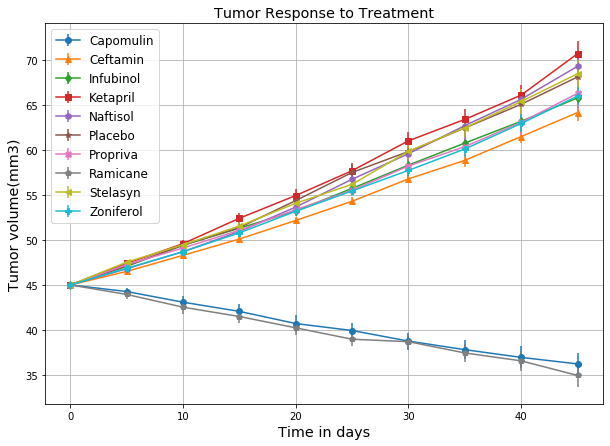

In [5]:
# Generate the Plot (with Error Bars)

def plot_data(x_plt,y_plt,yerr_plt, marker_plt):
    plt.errorbar(x=x_plt,y=y_plt,yerr=yerr_plt, marker = marker_plt)
    
markers_pharma = ["o", "^","d", "s","h","*","X","p","<","P"]
plt.figure(figsize=(10,7))
plt.grid()
plt.title('Tumor Response to Treatment',fontsize='x-large')
plt.ylabel("Tumor volume(mm3)",fontsize='x-large')
plt.xlabel("Time in days",fontsize='x-large')
    
columns_df = df_tumor_vol.columns
i=0
for col in columns_df:
    plot_data(df_tumor_vol.index, df_tumor_vol[col], df_tumor_vol_sem[col],markers_pharma[i])
    i+=1
    

plt.legend(df_tumor_vol.columns,fontsize='large')   
plt.savefig("TumorResponse_withErrorbars.png")   
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_tp_grp_metas_df = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().to_frame()

# Preview DataFrame
drug_tp_grp_metas_df.head()
drug_tp_grp_metas_df = drug_tp_grp_metas_df.reset_index()
df_metas = drug_tp_grp_metas_df.pivot(index = 'Timepoint', columns = 'Drug', values = "Metastatic Sites")
df_metas.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
drug_tp_grp_metas_sem_df = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().to_frame()
drug_tp_grp_metas_sem_df.head()

drug_tp_grp_metas_sem_df = drug_tp_grp_metas_sem_df.reset_index()
df_sem_metas = drug_tp_grp_metas_sem_df.pivot(index = 'Timepoint', columns = 'Drug', values = "Metastatic Sites")
df_sem_metas.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


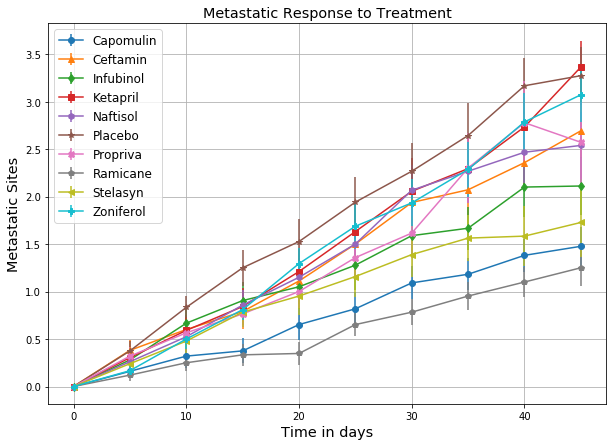

In [8]:
plt.figure(figsize=(10,7))
plt.grid()
plt.title('Metastatic Response to Treatment', fontsize='x-large')
plt.ylabel("Metastatic Sites", fontsize='x-large')
plt.xlabel("Time in days", fontsize='x-large')
    
columns_df = df_metas.columns
i=0
for col in columns_df:
    plot_data(df_metas.index, df_metas[col], df_sem_metas[col], markers_pharma[i])
    i+=1


plt.legend(df_metas.columns, fontsize='large')   
plt.savefig("MetastaticResponseToTreatement.png")
plt.show()

## Survival Rates

In [9]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
drug_tp_grp_mice_count_df = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count().to_frame()
drug_tp_grp_mice_count_df.rename(columns={"Mouse ID": "Mouse Count"}, inplace = True)
# Preview DataFrame
drug_tp_grp_mice_count_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
drug_tp_grp_mice_count_df = drug_tp_grp_mice_count_df.reset_index()
df_mice_count = drug_tp_grp_mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = "Mouse Count")
df_mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


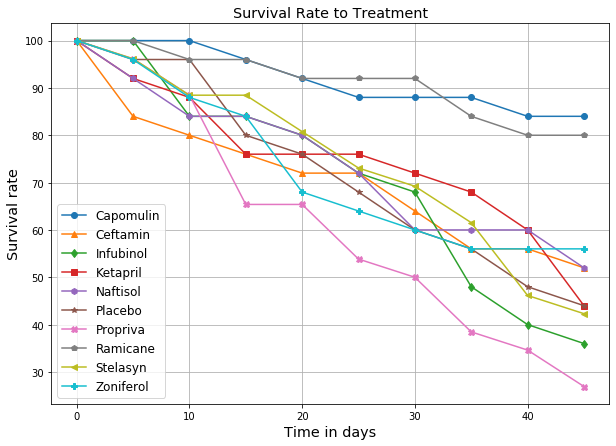

In [11]:
plt.figure(figsize=(10,7))
plt.grid()
plt.title('Survival Rate to Treatment', fontsize='x-large')
plt.ylabel("Survival rate", fontsize='x-large')
plt.xlabel("Time in days", fontsize='x-large')
    

i=0
for col in df_mice_count.columns:
    total_count = df_mice_count[col][0]
    plt.plot(df_mice_count.index, df_mice_count[col]*100/total_count, marker=markers_pharma[i])
    i+=1


plt.legend(df_mice_count.columns, fontsize='large')   
plt.savefig("SurvivalRate_To_Treatement.png")   
plt.show()

## Summary Bar Graph

In [12]:
# Calculate the percent changes for each drug
# Display the data to confirm
change_in_tumor_volumn = pd.Series()
first_index = df_tumor_vol.index[0]
last_index = df_tumor_vol.index[-1]
for col in df_tumor_vol.columns:
    change_in_tumor_volumn[col]=(df_tumor_vol[col][last_index] - df_tumor_vol[col][first_index])*100/df_tumor_vol[col][first_index]
                         

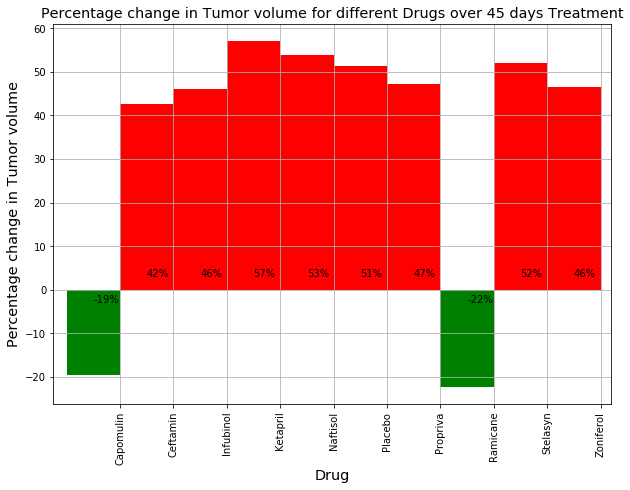

In [34]:
plt.figure(figsize=(10,7))

plt.title('Percentage change in Tumor volume for different Drugs over 45 days Treatment', fontsize='x-large')
plt.ylabel("Percentage change in Tumor volume", fontsize='x-large')
plt.xlabel("Drug", fontsize='x-large')



# obtaining the colors for bars based on whether >0(red) or <=0(green)
color = ['red' if val > 0 else 'green' for val in change_in_tumor_volumn]
#plotting the bar graph
fig_handle = change_in_tumor_volumn.plot(kind ="bar", color=color, width=-1, align='edge')
plt.grid()
#printing the data values on the bar graph
for i, v in enumerate(change_in_tumor_volumn):
    fig_handle.text( i-0.5,np.sign(v)*3, str(int(v))+"%", color='black')

(x, y) = fig_handle.get_xlim()
plt.xlim(x-1, y+0.2)
plt.savefig("Percent_Tumor_Vol_change_to_Treatement.png")
plt.show()